# Mini Programming Assignment: Implement a Breadth-first Search Algorithm

**Name:** Ben Prescott

**Date:** 08/01/2021

**Course:** MSDS432 Summer 2021

#### Executive Summary

**Description:**

This notebook explores the use of the breadth first search algorithm on a manually created graph. The graph simulates a person-to-person connection tree with five different levels. Each level was searched for three different people, with the execution times of the searches logged and stored in a table for review. The average search time for each level was then plotted visually in a bar and line chart. 

**Algorithm Explanations**

Within a graph there are nodes and edges, and in this research the nodes represent people and edges represent a relationship with another person. The breadth first search algorithm runs on graph structure, starting at a given node (typically the root node) and identifying the first-degree connections, or the immediate relationships with the root node. It checks if any of those connections match the search criteria and, if not, adds the friends of those first-degree connections to the search. It does this by managing a queue structure, where the first-degree connections are initially added to the queue, and secondary and tertiary connections (etc.) are added until the search criteria is met. 

The goal of the breadth first algorithm is to first determine if a path exists to the intended search target, as well as what the shortest path is to getting to the target from the starting point. In looking for a specific person, it may be that the graph I am traversing does not have any people with relationships to the name I am searching for. However, if there is a relationship with that name (node) then breadth first will find the shortest path to that person.  

**Approach**

To start this assignment a 5-level graph was created using a Python dictionary. Each level has five unique people each with five relationships to other people defined. The five unique people may have overlapping relationships (i.e. Ben might know Todd, as well as Jason knowing Todd). The second level has five more unique names with their own five relationships, but each level in the graph does not have a directed relationship with any person in the previous level. In a graphical tree view, this would indicate that the arrows on the graph edges would only be pointing downward, none going from bottom to top. 

Some individuals on the different levels have relationships with others who do not have any additional relationships themselves. These were added as nodes (keys) to the graph (dictionary) with no connections, as to represent a dead end in the search and still be available for the algorithm to search. This is also required for the algorithm to function properly, as it may find a name in one of the earlier tiers that has no node on the graph, throwing an error. 

The breadth first search algorithm was then defined, using the provided algorithm from this week's reading. One slight modification was made to the algorithm to search for a name in its entirety, not just a name ending in a specific letter. 

Next, three names from each level were added to a list. Each name in these lists are then searched for using the algorithm in an iterative fashion. The first node created in the graph was my name (Ben), so the search for each of the names on each of the layers started the search at my node. This way the search always started from the same location, providing fair results in execution times. The execution times of each loop were then saved to a list.

The names being searched for, the level at which they resided, and the time it took the algorithm to find that name were all added to a Pandas DataFrame for review. The average execution time for each level was then plotted in a bar chart with an overlaid line chart, showing the increase in execution times the deeper in the graph the name resided. 

**Results**

The worst case running time of the breadth first algorith is $O(V + E)$, meaning that it may need to search through every node and edge to find the result. Depending on the different relationships and how deep in the graph/tree the searched name is, the execution time may take longer. This also depends on how many nodes/edges exist in the graph to begin with, as larger graphs may take longer to search. However, the search time of breadth first may outperform that of something like depth first search, as long as the target name is closer to the starting node (root node) in the search. 

Overall, the results show a trend in increased execution times the further down the tree the names reside. This aligns with how breadth first search works, as its performance increases the closer the names are to the root node. There is an outlier in the first level search, as the name "Jess" took just as long as a name from the last level. However, the other two names from the level 1 search took less time than any other searches from the other levels, still indicating that the first level searches would be the faster in breadth first. 

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(suppress=True)

## Creating Connections Graph

In [294]:
graph = {}

# Level 1
graph['Ben'] = ['Todd','Jason','David','Matt','Sarah']
graph['Todd'] = ['Jason','James','Jess','David','Matt']
graph['Jason'] = ['Cooper','Jess','David','Matt','Josh']
graph['Cooper'] = ['Ryan','Sarah','Lisa','Matt','James']
graph['Ryan'] = ['James','Jess','David','Matt','Sarah']

# Level 2
graph['James'] = ['Jess','Tessa','Jack','Raymond','Dennis']
graph['Jess'] = ['David','Raymond','Dennis','Doris','Grace']
graph['David'] = ['Matt','Jack','Amber','Marilyn','Dennis']
graph['Matt'] = ['Sarah','Tessa','Jack','Raymond','Danielle']
graph['Sarah'] = ['Tyler','Tessa','Jack','Marie','Dennis']

# Level 3
graph['Tyler'] = ['Tessa','Walter','Keith','Natalie','Roger'] 
graph['Tessa'] = ['Jack','Walter','Albert','Abigail','Bryan']
graph['Jack'] = ['Raymond','Diana','Keith','Natalie','Roger']
graph['Raymond'] = ['Dennis','Walter','Keith','Natalie','Roger']
graph['Dennis'] = ['Zachary','Vincent','Billy','Natalie','Roger']

# Level 4
graph['Zachary'] = ['Walter','Kyle','Lily','Sean','Katie']
graph['Walter'] = ['Keith','Kyle','Frances','Jackie','Katie']
graph['Keith'] = ['Natalie','Gloria','Lily','Martha','Katie']
graph['Natalie'] = ['Roger','Kyle','Lily','Sean','Katie']
graph['Roger'] = ['Hannah','Noah','Gerald','Sean','Katie']

# Level 5
graph['Peter'] = ['Kyle','Carl','Joyce','Vicki','Jerry']
graph['Kyle'] = ['Lily','Carl','Joyce','Decker','Gabe']
graph['Lily'] = ['Sean','Cat','Joyce','Vicki','Jerry']
graph['Sean'] = ['Katie','Sammy','Joyce','Brandon','Jerry']
graph['Katie'] = ['Lawrence','Carl','Scott','Vicki','Curtis']

# Nodes with no outgoing connections
graph['Amber'] = []
graph['Doris'] = []
graph['Grace'] = []
graph['Diana'] = []
graph['Cat'] = []
graph['Josh'] = []
graph['Lisa'] = []
graph['Marie'] = []
graph['Decker'] = []
graph['Danielle'] = []
graph['Vincent'] = []
graph['Marilyn'] = []
graph['Abigail'] = []
graph['Bryan'] = []
graph['Billy'] = []
graph['Albert'] = []
graph['Frances'] = []
graph['Jackie'] = []
graph['Gabe'] = []
graph['Gloria'] = []
graph['Martha'] = []
graph['Hannah'] = []
graph['Noah'] = []
graph['Gerald'] = []
graph['Lawrence'] = []
graph['Carl'] = []
graph['Joyce'] = []
graph['Vicki'] = []
graph['Jerry'] = []
graph['Sammy'] = []
graph['Brandon'] = []
graph['Scott'] = []
graph['Curtis'] = []

## Defining Breadth-first Search Algorithm

In [295]:
from collections import deque

def person_is_seller(name):
      return name == currentName
    
def search(name):
    search_queue = deque()
    search_queue += graph[name]
    # This is how you keep track of which people you've searched before.
    searched = set()
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person_is_seller(person):
                print(person + " has been found!")
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.add(person)
    return False

## Defining Search Criteria

In [321]:
# Selecting 3 names from each level to search for
l1names = ['Jess','David','James']
l2names = ['Tessa','Doris','Danielle']
l3names = ['Walter','Keith','Billy']
l4names = ['Kyle','Francis','Noah']
l5names = ['Carl','Vicki','Curtis']

## Searching & Logging Execution Times

In [322]:
# Creating lists to store execution times
l1times = []
l2times = []
l3times = []
l4times = []
l5times = []

# For loops for each level, using my name (node) as the starting point
for n in l1names:
    currentName = n
    start = timer()
    result = search('Ben')
    end = timer()
    l1times.append(end-start)
    print(end-start)
    
for n in l2names:
    currentName = n
    start = timer()
    result = search('Ben')
    end = timer()
    l2times.append(end-start)
    print(end-start)
    
for n in l3names:
    currentName = n
    start = timer()
    result = search('Ben')
    end = timer()
    l3times.append(end-start)
    print(end-start)
    
for n in l4names:
    currentName = n
    start = timer()
    result = search('Ben')
    end = timer()
    l4times.append(end-start)
    print(end-start)
    
for n in l5names:
    currentName = n
    start = timer()
    result = search('Ben')
    end = timer()
    l5times.append(end-start)
    print(end-start)


Jess has been found!
8.150000940077007e-05
David has been found!
1.5599987818859518e-05
James has been found!
1.4899997040629387e-05
Tessa has been found!
2.78999941656366e-05
Doris has been found!
1.9899991457350552e-05
Danielle has been found!
2.1799991372972727e-05
Walter has been found!
3.599999763537198e-05
Keith has been found!
2.2499996703118086e-05
Billy has been found!
2.850001328624785e-05
Kyle has been found!
4.030000127386302e-05
3.2800002372823656e-05
Noah has been found!
0.00011399999493733048
Carl has been found!
7.160000677686185e-05
Vicki has been found!
0.0002572999947005883
Curtis has been found!
7.829999958630651e-05


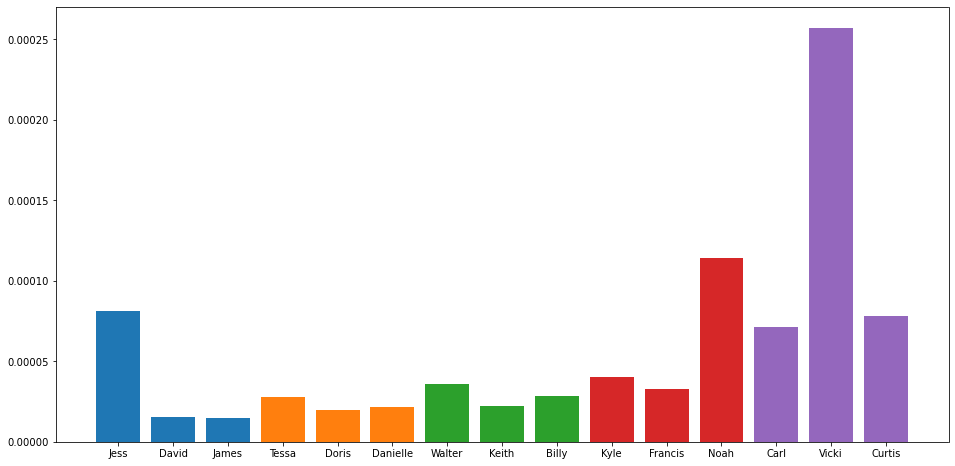

In [349]:
# Initial bar plot just to visualize the results
plt.figure(figsize=(16,8))
plt.bar(l1names,l1times)
plt.bar(l2names,l2times)
plt.bar(l3names,l3times)
plt.bar(l4names,l4times)
plt.bar(l5names,l5times);

## Comparison Table & Graphs

In [324]:
# Creating a Pandas DataFrame for table reference
pd.set_option("display.precision", 10)
results = pd.DataFrame()
results['Name'] = l1names+l2names+l3names+l4names+l5names
results['Level'] = np.divmod(np.arange(len(results)),3)[0]+1
results['Execution Times'] = l1times+l2times+l3times+l4times+l5times
results

,Name,Level,Execution Times
0,Jess,1,0.0000815
1,David,1,0.0000156
2,James,1,0.0000149
3,Tessa,2,0.0000279
4,Doris,2,0.0000199
5,Danielle,2,0.0000218
6,Walter,3,0.0000360
7,Keith,3,0.0000225
8,Billy,3,0.0000285
9,Kyle,4,0.0000403


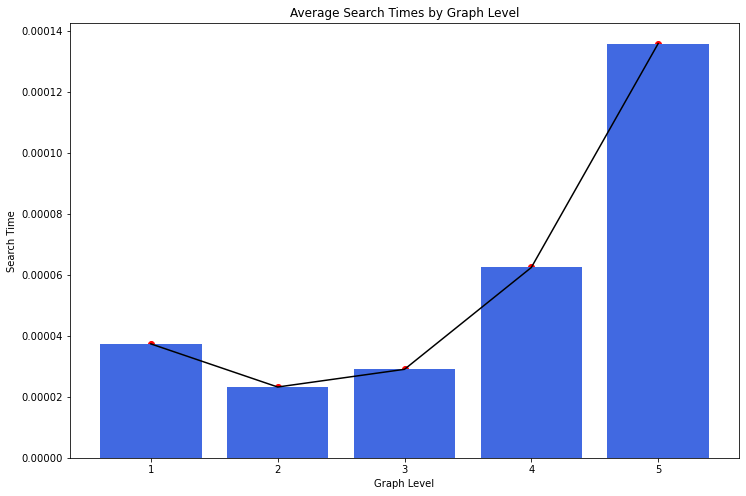

In [347]:
# Grouping results by the average time for each level
plotme = results.groupby('Level').mean()

# Creating bar and line plot overlay
plt.figure(figsize=(12,8))
plt.title('Average Search Times by Graph Level')
plt.xlabel('Graph Level')
plt.ylabel('Search Time')
plt.bar(plotme.index, plotme['Execution Times'], color='royalblue')
plt.plot(plotme.index, plotme['Execution Times'], color ='black')
plt.scatter(plotme.index, plotme['Execution Times'], color ='red')
plt.plot();